In [1]:
%load_ext autoreload
%autoreload 2

from trial import *

In [2]:
data_range = find_max_min_values_maps()

print(data_range)

# TODO: compare SLICS variance with cosmoSLICS variance
# that is, compare los variance within SLICS to variance between different cosmologies

# SLICS determines the sample variance, will be a list of persistence diagrams for each line of sight
slics_pds = []
# cosmoSLICS is different cosmologies, will be a list of persistence diagrams for each cosmology
cosmoslics_pds = []
cosmoslics_uniq_pds = []

slics_maps = []
cosmoslics_maps = []

print('Analyzing maps...')
for dir in tqdm(glob.glob('maps/*')):
	if os.path.isdir(dir):
		cosm = dir.split('_')[-1]

		cosmoslics = 'Cosmo' in cosm

		curr_cosm_maps = []
		for i, map_path in enumerate(tqdm(glob.glob(f'{dir}/*.npy'), leave=False)):
			# if len(slics_pds) > 5 and not cosmoslics:
			# 	continue
			# if len(cosmoslics_uniq_pds) > 5 and cosmoslics:
			# 	continue

			map = Map(map_path)
			map.get_persistence()
			curr_cosm_maps.append(map)

			pd = PersistenceDiagram([map], cosmology=cosm)
			pd.generate_betti_numbers_grids(resolution=100, data_ranges_dim=data_range)

			# SLICS must be saved at LOS level
			if not cosmoslics:
				slics_pds.append(pd)
				slics_maps.append(map)
			else:
				cosmoslics_uniq_pds.append(pd)
				cosmoslics_maps.append(map)

		if len(curr_cosm_maps) > 0:
			pd = PersistenceDiagram(curr_cosm_maps, cosmology=cosm)
			# pd.generate_heatmaps(resolution=100, gaussian_kernel_size_in_sigma=3)
			# pd.add_average_lines()
			pd.generate_betti_numbers_grids(resolution=100, data_ranges_dim=data_range)

			pd.plot()

			# cosmoSLICS must be saved at cosmology level
			if cosmoslics:
				cosmoslics_pds.append(pd)

Determining max and min values in maps...
Found file with saved values, reading...
{0: [-0.05554313552952604, 0.03412921981880379], 1: [-0.029925435485797586, 0.07432709544723744]}
Analyzing maps...


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/218 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Cosmol8
dim 0 featurecount = 3490
dim 1 featurecount = 3201
Cosmol12
dim 0 featurecount = 3457
dim 1 featurecount = 3345
Cosmol5
dim 0 featurecount = 3483
dim 1 featurecount = 3276
Cosmol15
dim 0 featurecount = 3514
dim 1 featurecount = 3251
Cosmol4
dim 0 featurecount = 3442
dim 1 featurecount = 3243
Cosmolfid
dim 0 featurecount = 3465
dim 1 featurecount = 3285
Cosmol14
dim 0 featurecount = 3441
dim 1 featurecount = 3274
Cosmol1
dim 0 featurecount = 3471
dim 1 featurecount = 3237
Cosmol24
dim 0 featurecount = 3467
dim 1 featurecount = 3262
Cosmol20
dim 0 featurecount = 3471
dim 1 featurecount = 3257
Cosmol18
dim 0 featurecount = 3478
dim 1 featurecount = 3272
Cosmol22
dim 0 featurecount = 3461
dim 1 featurecount = 3241
Cosmol7
dim 0 featurecount = 3471
dim 1 featurecount = 3287
Cosmol21
dim 0 featurecount = 3476
dim 1 featurecount = 3237
Cosmol13
dim 0 featurecount = 3482
dim 1 featurecount = 3256
Cosmol19
dim 0 featurecount = 3461
dim 1 featurecount = 3190
Cosmol16
dim 0 featurecount 

Text(0, 0.5, 'dim1 count (holes)')

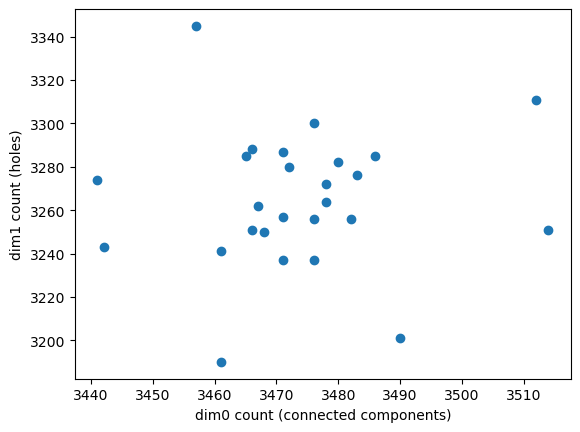

In [16]:
dim0_count = []
dim1_count = []

for cspd in cosmoslics_pds:
	print(cspd.cosmology)
	print('dim 0 featurecount =', len(cspd.dimension_pairs[0]))
	dim0_count.append(len(cspd.dimension_pairs[0]))
	print('dim 1 featurecount =', len(cspd.dimension_pairs[1]))
	dim1_count.append(len(cspd.dimension_pairs[1]))

fig, ax = plt.subplots()
ax.scatter(dim0_count, dim1_count)
ax.set_xlabel('dim0 count (connected components)')
ax.set_ylabel('dim1 count (holes)')

In [4]:
print('Calculating SLICS/cosmoSLICS variance maps...')
slics_bngs = {
	dim: [pd.betti_numbers_grids[dim] for pd in slics_pds] for dim in [0, 1]
}
cosmoslics_bngs = {
	dim: [pd.betti_numbers_grids[dim] for pd in cosmoslics_pds] for dim in [0, 1]
}

from analysis.persistence_diagram import BettiNumbersGridVarianceMap

dim = 0
slics_bngvm_0 = BettiNumbersGridVarianceMap(slics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
slics_bngvm_0.save_figure(os.path.join('plots', 'slics'), title='SLICS variance, dim=0')
dim = 1
slics_bngvm_1 = BettiNumbersGridVarianceMap(slics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
slics_bngvm_1.save_figure(os.path.join('plots', 'slics'), title='SLICS variance, dim=1')

dim = 0
cosmoslics_bngvm_0 = BettiNumbersGridVarianceMap(cosmoslics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
cosmoslics_bngvm_0.save_figure(os.path.join('plots', 'cosmoslics'), title='cosmoSLICS variance, dim=0')
dim = 1
cosmoslics_bngvm_1 = BettiNumbersGridVarianceMap(cosmoslics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
cosmoslics_bngvm_1.save_figure(os.path.join('plots', 'cosmoslics'), title='cosmoSLICS variance, dim=1')

fig, ax = plt.subplots()
ax.set_title('slics / cosmoslics variance, dim=0')
imax = ax.imshow((slics_bngvm_0.map / cosmoslics_bngvm_0.map)[::-1, :])
fig.colorbar(imax)
fig.savefig(os.path.join('plots', 'slics_cosmoslics_variance_0.png'))
plt.close(fig)

fig, ax = plt.subplots()
ax.set_title('slics / cosmoslics variance, dim=1')
imax = ax.imshow((slics_bngvm_1.map / cosmoslics_bngvm_1.map)[::-1, :])
fig.colorbar(imax)
fig.savefig(os.path.join('plots', 'slics_cosmoslics_variance_1.png'))
plt.close(fig)

slics_pd = PersistenceDiagram(slics_maps)
slics_pd.generate_betti_numbers_grids(data_ranges_dim=data_range)
cosmoslics_pd = PersistenceDiagram(cosmoslics_maps)
cosmoslics_pd.generate_betti_numbers_grids(data_ranges_dim=data_range)

cosmoslics_bngs = {
	dim: np.array([pd.betti_numbers_grids[dim].map for pd in cosmoslics_pds]) for dim in [0, 1]
}

for dim in [0, 1]:
	dist_power = np.mean(np.square(cosmoslics_bngs[dim] - slics_pd.betti_numbers_grids[dim].map) / BettiNumbersGridVarianceMap(slics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim).map, axis=0)

	fig, ax = plt.subplots()
	ax.set_title('Pixel distinguishing power')
	imax = ax.imshow(dist_power[::-1, :], extent=(*data_range[dim], *data_range[dim]))
	fig.colorbar(imax)

	fig.savefig(os.path.join('plots', f'pixel_distinguishing_power_{dim}.png'))
	plt.close(fig)

Calculating SLICS/cosmoSLICS variance maps...


/var/tmp/abbo/ipykernel_113899/49919377.py:27: RuntimeWarning: divide by zero encountered in divide
  imax = ax.imshow((slics_bngvm_0.map / cosmoslics_bngvm_0.map)[::-1, :])
/var/tmp/abbo/ipykernel_113899/49919377.py:27: RuntimeWarning: invalid value encountered in divide
  imax = ax.imshow((slics_bngvm_0.map / cosmoslics_bngvm_0.map)[::-1, :])
/var/tmp/abbo/ipykernel_113899/49919377.py:34: RuntimeWarning: divide by zero encountered in divide
  imax = ax.imshow((slics_bngvm_1.map / cosmoslics_bngvm_1.map)[::-1, :])
/var/tmp/abbo/ipykernel_113899/49919377.py:34: RuntimeWarning: invalid value encountered in divide
  imax = ax.imshow((slics_bngvm_1.map / cosmoslics_bngvm_1.map)[::-1, :])
/var/tmp/abbo/ipykernel_113899/49919377.py:49: RuntimeWarning: divide by zero encountered in divide
  dist_power = np.mean(np.square(cosmoslics_bngs[dim] - slics_pd.betti_numbers_grids[dim].map) / BettiNumbersGridVarianceMap(slics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimens

In [39]:
a = np.array([
	[0, 0],
	[1, 1],
	[0, 2],
	[3, 0]
])

def rotation_matrix(angle):
	c = np.cos(np.radians(angle))
	s = np.sin(np.radians(angle))
	return np.array([[c, -s], [s, c]])

angle = 45
# print(np.matmul(rotation_matrix(angle), a))
print(np.einsum('ij,kj->ki', rotation_matrix(angle), a))

rotated = scipy.ndimage.rotate(cosmoslics_pds[0].dimension_pairs[0], 45)

print(rotated.shape)

[[ 0.00000000e+00  0.00000000e+00]
 [ 1.11022302e-16  1.41421356e+00]
 [-1.41421356e+00  1.41421356e+00]
 [ 2.12132034e+00  2.12132034e+00]]
(2469, 2469)


/net/vdesk/data2/bach1/abbo/mrp/mrp/conda_mrp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/net/vdesk/data2/bach1/abbo/mrp/mrp/conda_mrp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/net/vdesk/data2/bach1/abbo/mrp/mrp/conda_mrp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/net/vdesk/data2/bach1/abbo/mrp/mrp/conda_mrp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

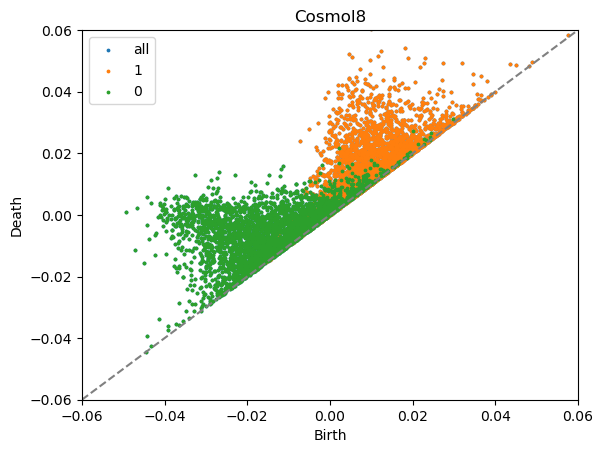

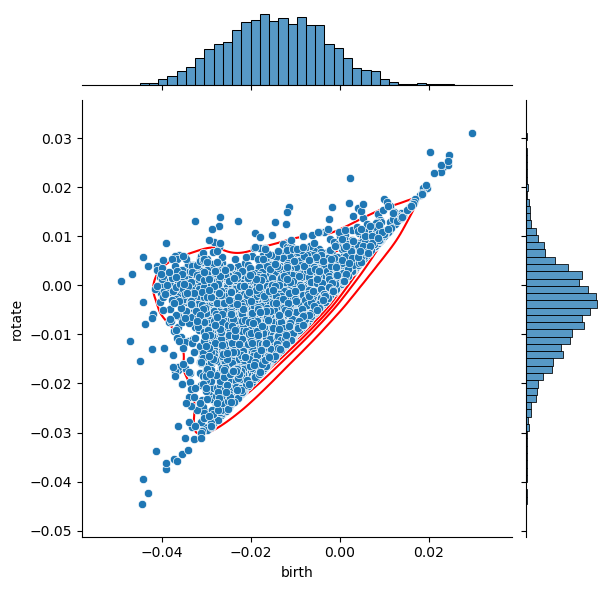

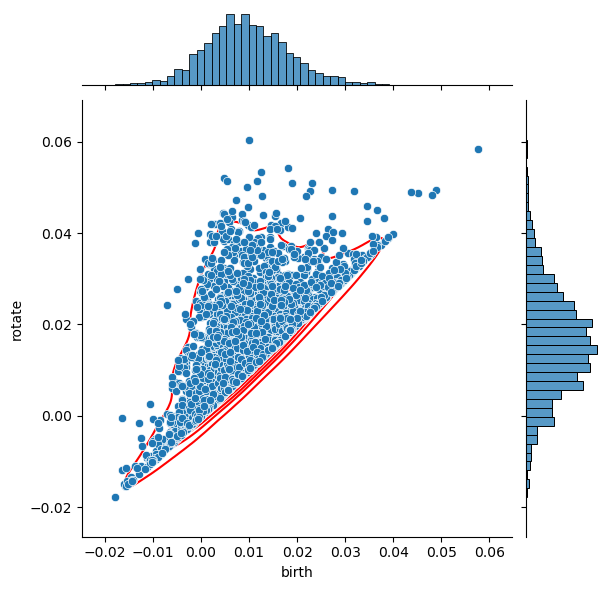

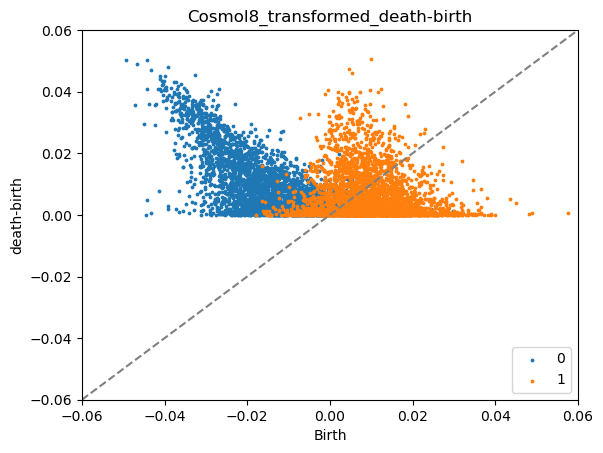

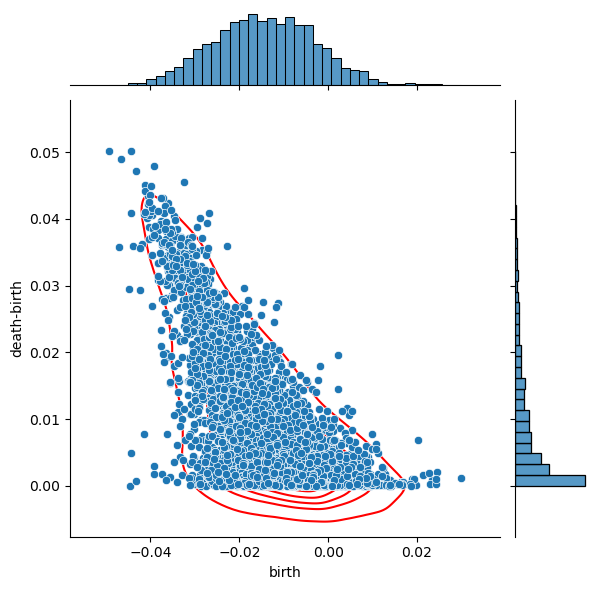

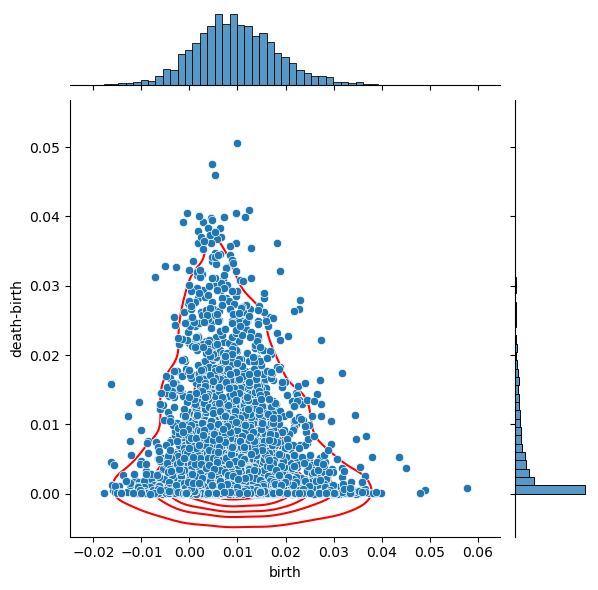

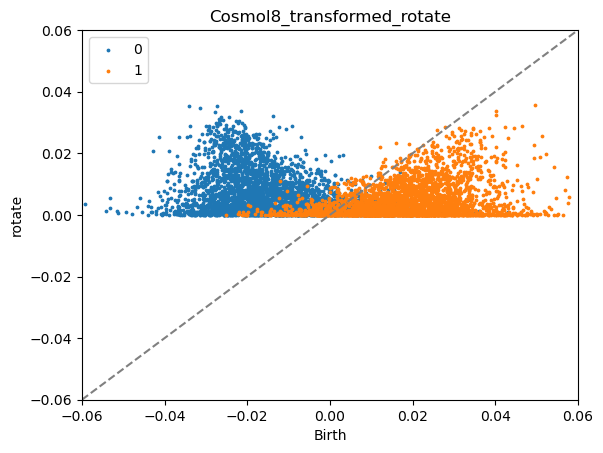

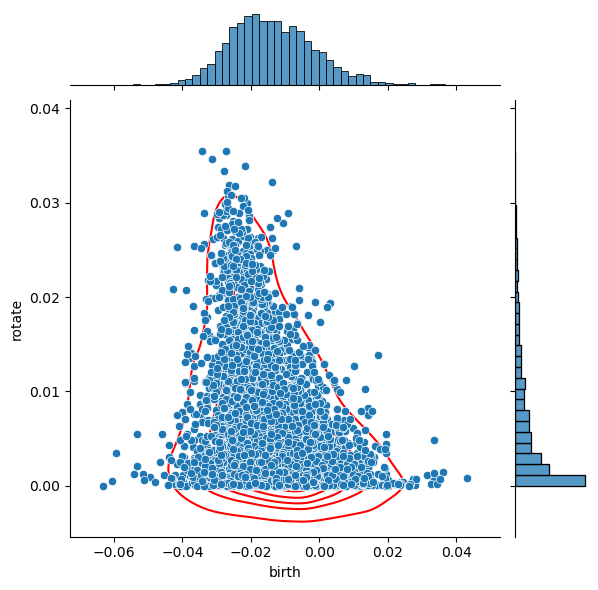

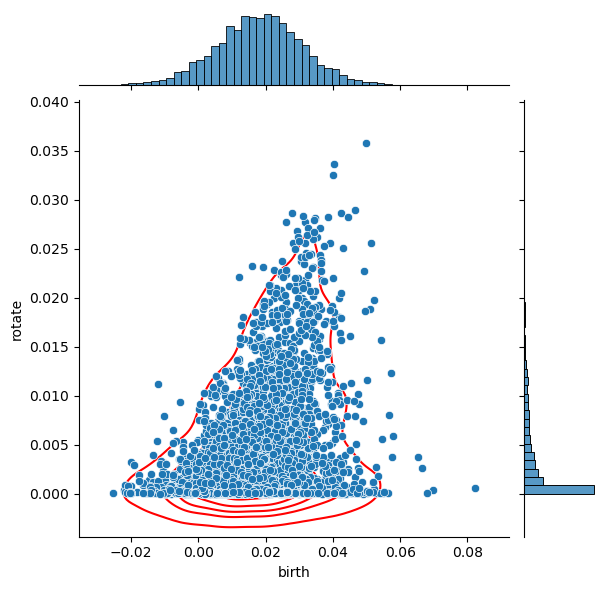

In [40]:
# Try PersistenceDiagram transformation

from analysis.persistence_diagram import PersistenceDiagram
import seaborn as sns
import pandas as pd
import scipy

def transform_subtract(old_pd, new_pd):
	new_pd.dimension_pairs = {
		dim: np.array([old_pd.dimension_pairs[dim][:, 0], old_pd.dimension_pairs[dim][:, 1] - old_pd.dimension_pairs[dim][:, 0]]).T
		for dim in [0, 1]
	}

def transform_square(old_pd, new_pd):
	new_pd.dimension_pairs = {
		dim: np.array([old_pd.dimension_pairs[dim][:, 0], np.square(old_pd.dimension_pairs[dim][:, 1])]).T
		for dim in [0, 1]
	}

def transform_subtract_both(old_pd, new_pd):
	new_pd.dimension_pairs = {
		dim: np.array([old_pd.dimension_pairs[dim][:, 0] - old_pd.dimension_pairs[dim][:, 1], old_pd.dimension_pairs[dim][:, 1] - old_pd.dimension_pairs[dim][:, 0]]).T
		for dim in [0, 1]
	}

def transform_rotate(old_pd, new_pd):
	new_pd.dimension_pairs = {
		dim: np.einsum('ij,kj->ki', rotation_matrix(-45), old_pd.dimension_pairs[dim]) for dim in [0, 1]
	}

for perdi in cosmoslics_pds:

	perdi.plot(close=False)

	for dim in [0, 1]:
		data = pd.DataFrame(data=perdi.dimension_pairs[dim], columns=['birth', name])
		gr = sns.jointplot(data=data, x='birth', y=name)

		gr.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

	for transform, name in zip(
		[transform_subtract, transform_rotate],
		['death-birth', 'rotate']
	):
	
		new_pd = PersistenceDiagram(perdi.maps, cosmology=f'{perdi.cosmology}_transformed_{name}')

		transform(perdi, new_pd)
		fig, ax = new_pd.plot(close=False)
		# ax.set_ylim(ymin=-0.005, ymax=0.06)
		ax.set_ylabel(name)

		fig.savefig(os.path.join('plots', 'persistence_diagrams', f'{new_pd.cosmology}.png'))

		# Make Jointplot for dim 0, 1 separately
		for dim in [0, 1]:
			data = pd.DataFrame(data=new_pd.dimension_pairs[dim], columns=['birth', name])
			gr = sns.jointplot(data=data, x='birth', y=name)

			gr.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

			# TODO: fit skewed Gaussian to rotated data

	break
